<a href="https://colab.research.google.com/github/munawarali93/NASA-Near-Earth-Objects/blob/main/NASA_near_earth_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mentor:
Kashif bari

##Team members:
1. Munawar Ali
2. Cagatay Ayhan
3. Ece KARACAM
4. Mostofa Hisham

Near-Earth Objects (NEOs) are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood. As they orbit the Sun, Near-Earth Objects occasionally approach close to Earth. We plan to develop several models for detecting whether or not a NEO is hazardous. We will likely use the data provided here: https://www.kaggle.com/datasets/sameepvani nasa-nearest-earth-objects/data
Sources: https://api.nasa.gov
https://cneos.jpl.nasa.gov/ca/

##Basic Modules

In [1]:
!git clone https://github.com/munawarali93/NASA-Near-Earth-Objects

Cloning into 'NASA-Near-Earth-Objects'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), done.
Resolving deltas: 100% (1/1), done.


In [2]:
! ls -l

total 8
drwxr-xr-x 3 root root 4096 Nov  7 17:45 NASA-Near-Earth-Objects
drwxr-xr-x 1 root root 4096 Nov  6 14:20 sample_data


In [3]:
path = r'/content/drive/MyDrive/NASA_near_earth_objects'

In [ ]:
%reset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import keras
import tensorflow as tf

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics as ks_metrics

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nasa = pd.read_csv("/content/drive/MyDrive/NASA_near_earth_objects/neo.csv.zip")
nasa['average_diameter'] = nasa['est_diameter_max'] + nasa['est_diameter_min']
nasa.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,average_diameter
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,3.877686
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.860147
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,2.336537
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.312300
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.825225


In [ ]:
nasa = nasa.drop(columns = ['orbiting_body','sentry_object', 'id', 'name']).copy()

In [ ]:
nasa['hazardous'] = nasa['hazardous'].replace({True: 1, False: 0})
nasa.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,average_diameter
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,3.877686
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,0.860147
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,2.336537
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,0.312300
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,0.825225


In [ ]:
y = nasa['hazardous'].copy()
X = nasa.drop('hazardous', axis=1).copy()
y.shape

(90836,)

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,average_diameter
0,3.587284,3.587284,-1.363913,0.795153,-2.348632,3.587284
1,0.463529,0.463529,1.009040,1.090357,-1.218735,0.463529
2,1.991887,1.991887,2.616983,0.569624,-1.968544,1.991887
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,-0.103601
4,0.427378,0.427378,-0.210697,0.412001,-1.187637,0.427378


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [ ]:
# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[-0.52628678 -0.52628678  0.20133411 -0.46244289 -3.3494101  -0.52628678]]


[[9.89974523e-01 1.00254769e-02]
 [9.99166074e-01 8.33925929e-04]
 [9.96450286e-01 3.54971406e-03]
 ...
 [9.99864764e-01 1.35236081e-04]
 [7.21428455e-01 2.78571545e-01]
 [9.92886344e-01 7.11365639e-03]]
The model accuracy is 90.17503302509907%


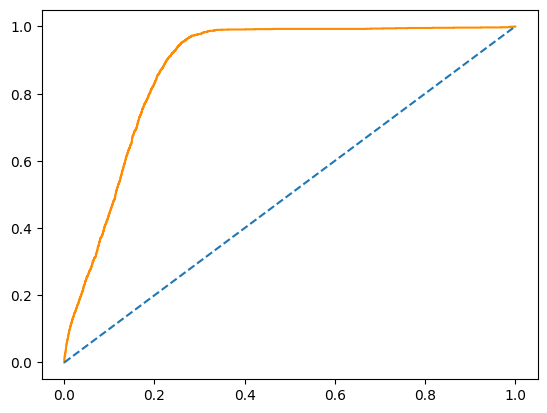

0.8780532631638874

In [ ]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)
print(preds)
# Print the accuracy score the model
print("The model accuracy is %s%%"%(100*clf_logistic.score(X_test, y_test)))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)
auc

In [ ]:
def lift_curve(probabilities, title = "Model"):

    #First, sort the probabilities in decreasing order
    probabilities = -1*np.sort(-1*probabilities)
    N = np.shape(probabilities)[0]

    #Now, build the three curves for the graph like in the paper
    lift_curve_values = [sum(probabilities[0:(i+1)]) for i in range(N)]
    baseline_values = [((i+1)/N)*lift_curve_values[-1] for i in range(N)]
    best_values = [min(i+1,lift_curve_values[-1]) for i in range(N)]

    #Compute the area between the model curve and the baseline curve
    lift_area = sum([lift_curve_values[i] - baseline_values[i] for i in range(N)])
    best_area = sum([best_values[i] - baseline_values[i] for i in range(N)])
    area_ratio = lift_area/best_area

    print("The area ratio is %s"%(area_ratio))

    plt.title("Lift Curve for %s"%(title))
    plt.xlabel("# of total data points")
    plt.ylabel("# of target data points")

    plt.plot(baseline_values)
    plt.plot(best_values)
    plt.plot(lift_curve_values)

    plt.legend(["Baseline Model","Theoretically Best Model", "Actual Model"])

The area ratio is 0.7589772675459933


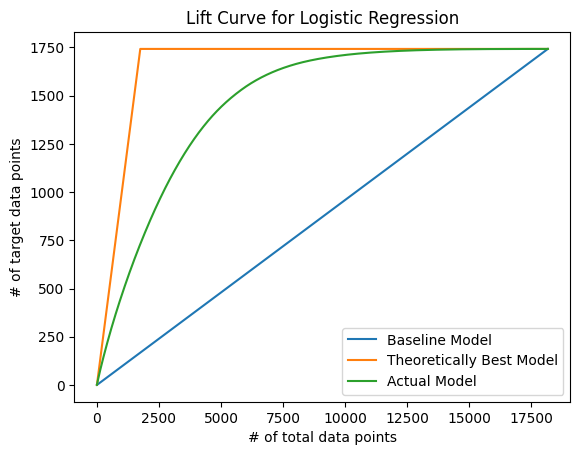

In [ ]:
lift_curve(np.reshape(preds[:,1],(18168,)), "Logistic Regression")

In [ ]:
X['hazardous'] = y
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,average_diameter
0,3.587284,3.587284,-1.363913,0.795153,-2.348632,0,3.587284
1,0.463529,0.463529,1.009040,1.090357,-1.218735,1,0.463529
2,1.991887,1.991887,2.616983,0.569624,-1.968544,0,1.991887
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,0,-0.103601
4,0.427378,0.427378,-0.210697,0.412001,-1.187637,1,0.427378


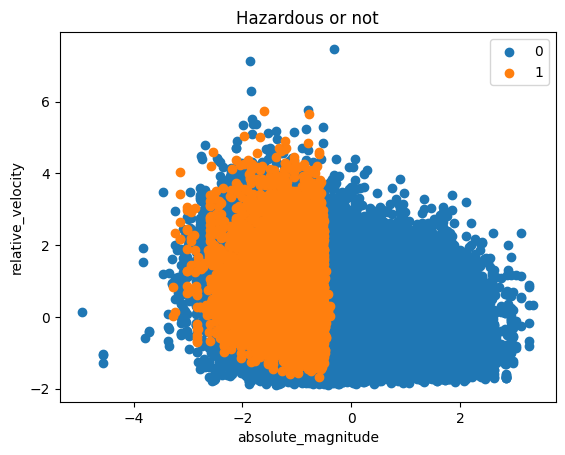

In [ ]:
labels = X['hazardous'].unique()
for i in labels:
  subset = X[X['hazardous'] == i]
  plt.scatter(subset['absolute_magnitude'], subset['relative_velocity'], label=i)

plt.xlabel('absolute_magnitude')
plt.ylabel('relative_velocity')
plt.title('Hazardous or not')
plt.legend()
plt.show()

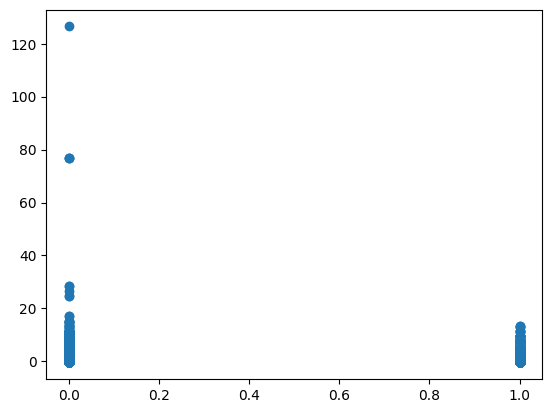

In [ ]:
plt.scatter(X['hazardous'], X['average_diameter'])